#Data Load & Description

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

# california 객체는 dictionary와 유사하게 동작함
# 데이터는 'data' 키에, 타겟(주택 가격)은 'target' 키에 저장되어 있음
X, y = california.data, california.target

# 데이터 형태 확인
print("Data shape: ", X.shape)  # 캘리포니아 데이터셋은 20640개의 샘플과 8개의 피처로 이루어짐
print("Target shape: ", y.shape)  # 타겟은 20640개의 주택 가격

Data shape:  (20640, 8)
Target shape:  (20640,)


In [ ]:
from sklearn.datasets import fetch_california_housing

# 데이터 로드
california = fetch_california_housing()

# 데이터셋 설명 출력
print(california['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Regression Models

## 모델 학습 및 성능 평가

###선형 모델

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 데이터 로드
california = fetch_california_housing()
X, y = california.data, california.target

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 로드
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.1) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.
lasso_reg = Lasso(alpha=0.01) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.

# 모델 학습
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [lin_reg, ridge_reg, lasso_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")


LinearRegression MSE: 0.5558915986952422
Ridge MSE: 0.5558827543113783
Lasso MSE: 0.5444491581246521


### 비선형 모델

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 데이터 로드
california = fetch_california_housing()
X, y = california.data, california.target

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

# 모델 학습
gb_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
lgb_reg.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [gb_reg, xgb_reg, lgb_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")


GradientBoostingRegressor MSE: 0.2940161448268125
XGBRegressor MSE: 0.22458289556216388
LGBMRegressor MSE: 0.21484820209255617


## 모델 해석

### 비선형 모델

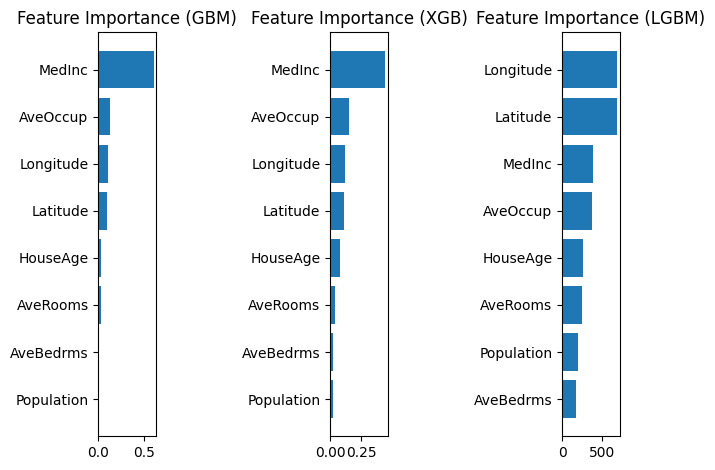

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gradient Boosting
feature_importance = gb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 2
plt.subplot(1, 3, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(california.feature_names)[sorted_idx])
plt.title('Feature Importance (GBM)')

# XGBoost
feature_importance = xgb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 2
plt.subplot(1, 3, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(california.feature_names)[sorted_idx])
plt.title('Feature Importance (XGB)')

# LightGBM
feature_importance = lgb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 2
plt.subplot(1, 3, 3)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(california.feature_names)[sorted_idx])
plt.title('Feature Importance (LGBM)')

plt.tight_layout()
plt.subplots_adjust(wspace=3)  # 그림 간의 가로 간격 조정
plt.show()

### 선형 모델

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 데이터 로드
data = fetch_california_housing()
X, y = data.data, data.target

# 데이터를 pandas DataFrame으로 변환
X_df = pd.DataFrame(X, columns=data.feature_names)
y_df = pd.DataFrame(y, columns=['Price'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# statsmodels는 절편(intercept)를 자동으로 추가하지 않으므로 수동으로 추가
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# 모델 생성 및 학습
model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()

# 모델 요약 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:19:48   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0

# 회귀 모델을 위한 데이터 처리

## Log Transformation

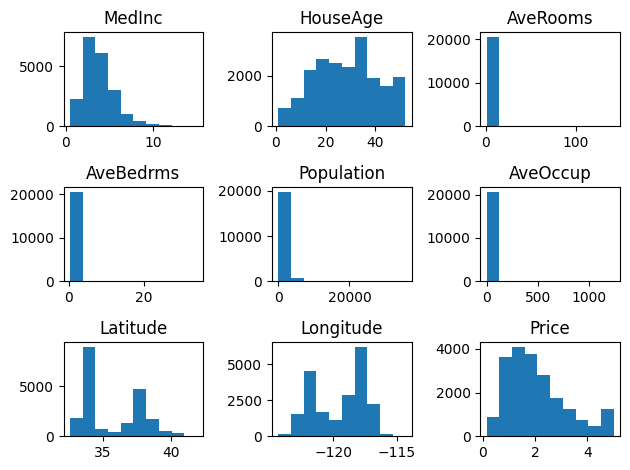

In [ ]:
plt.subplot(3, 3, 1)
plt.hist(X_df['MedInc'])
plt.title('MedInc')

plt.subplot(3, 3, 2)
plt.hist(X_df['HouseAge'])
plt.title('HouseAge')

plt.subplot(3, 3, 3)
plt.hist(X_df['AveRooms'])
plt.title('AveRooms')

plt.subplot(3, 3, 4)
plt.hist(X_df['AveBedrms'])
plt.title('AveBedrms')

plt.subplot(3, 3, 5)
plt.hist(X_df['Population'])
plt.title('Population')

plt.subplot(3, 3, 6)
plt.hist(X_df['AveOccup'])
plt.title('AveOccup')

plt.subplot(3, 3, 7)
plt.hist(X_df['Latitude'])
plt.title('Latitude')

plt.subplot(3, 3, 8)
plt.hist(X_df['Longitude'])
plt.title('Longitude')

plt.subplot(3, 3, 9)
plt.hist(y_df['Price'])
plt.title('Price')

plt.tight_layout()
plt.show()

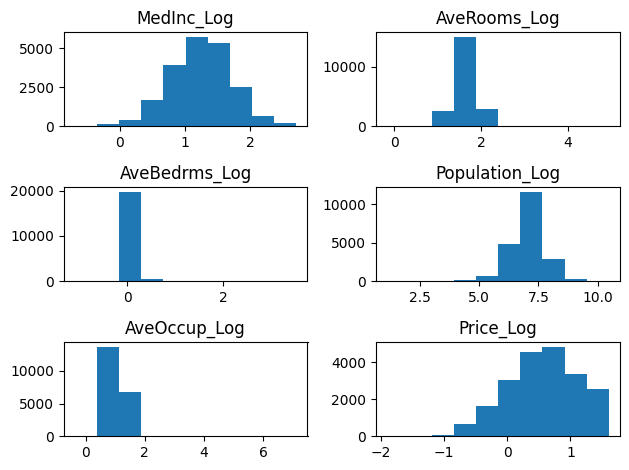

In [ ]:
X_df['MedInc_Log'] = np.log(X_df['MedInc'])
X_df['AveRooms_Log'] = np.log(X_df['AveRooms'])
X_df['AveBedrms_Log'] = np.log(X_df['AveBedrms'])
X_df['Population_Log'] = np.log(X_df['Population'])
X_df['AveOccup_Log'] = np.log(X_df['AveOccup'])
y_df['Price_Log'] = np.log(y_df['Price'])

plt.subplot(3, 2, 1)
plt.hist(X_df['MedInc_Log'])
plt.title('MedInc_Log')

plt.subplot(3, 2, 2)
plt.hist(X_df['AveRooms_Log'])
plt.title('AveRooms_Log')

plt.subplot(3, 2, 3)
plt.hist(X_df['AveBedrms_Log'])
plt.title('AveBedrms_Log')

plt.subplot(3, 2, 4)
plt.hist(X_df['Population_Log'])
plt.title('Population_Log')

plt.subplot(3, 2, 5)
plt.hist(X_df['AveOccup_Log'])
plt.title('AveOccup_Log')

plt.subplot(3, 2, 6)
plt.hist(y_df['Price_Log'])
plt.title('Price_Log')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 데이터 추출
X_df_log = X_df[['MedInc_Log', 'HouseAge', 'AveRooms_Log', 'AveBedrms_Log', 'Population_Log', 'AveOccup_Log', 'Latitude', 'Longitude']]
y_df_log = y_df[['Price_Log']]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_df_log, y_df_log, test_size=0.2, random_state=42)

# statsmodels는 절편(intercept)를 자동으로 추가하지 않으므로 수동으로 추가
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# 모델 생성 및 학습
model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()

# 모델 요약 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     4307.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:19:53   Log-Likelihood:                -4809.6
No. Observations:               16512   AIC:                             9637.
Df Residuals:                   16503   BIC:                             9707.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -21.1159      0.343    -61.

In [ ]:
# 모델 로드
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.1) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.
lasso_reg = Lasso(alpha=0.01) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.

# 모델 학습
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [lin_reg, ridge_reg, lasso_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")

LinearRegression MSE: 0.1100912461620697
Ridge MSE: 0.11009018491658573
Lasso MSE: 0.115375847332002


In [ ]:
# 모델 정의
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

# 모델 학습
gb_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
lgb_reg.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [gb_reg, xgb_reg, lgb_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor MSE: 0.06744254801228826
XGBRegressor MSE: 0.052175431841092135
LGBMRegressor MSE: 0.0521780157733372


## Mean Centering

In [ ]:
X_df_original = X_df.iloc[:, :8]

In [ ]:
#오류 메시지를 없애주는 코드
pd.options.mode.chained_assignment = None

In [ ]:
X_df_original['Medinc_0'] = X_df_original['MedInc'] - X_df_original['MedInc'].mean()
X_df_original['HouseAge_0'] = X_df_original['HouseAge'] - X_df_original['HouseAge'].mean()
X_df_original['AveRooms_0'] = X_df_original['AveRooms'] - X_df_original['AveRooms'].mean()
X_df_original['AveBedrms_0'] = X_df_original['AveBedrms'] - X_df_original['AveBedrms'].mean()
X_df_original['Population_0'] = X_df_original['Population'] - X_df_original['Population'].mean()
X_df_original['AveOccup_0'] = X_df_original['AveOccup'] - X_df_original['AveOccup'].mean()
X_df_original['Latitude_0'] = X_df_original['Latitude'] - X_df_original['Latitude'].mean()
X_df_original['Longitude_0'] = X_df_original['Longitude'] - X_df_original['Longitude'].mean()

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 데이터 추출
X_df_mean_centered = X_df_original[['Medinc_0', 'HouseAge_0', 'AveRooms_0', 'AveBedrms_0', 'Population_0', 'AveOccup_0', 'Latitude_0', 'Longitude_0']]
y_df = y_df[['Price']]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_df_mean_centered, y_df, test_size=0.2, random_state=42)

# statsmodels는 절편(intercept)를 자동으로 추가하지 않으므로 수동으로 추가
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# 모델 생성 및 학습
model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()

# 모델 요약 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:45:00   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0679      0.006    369.104   

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 데이터 로드
data = fetch_california_housing()
X, y = data.data, data.target

# 데이터를 pandas DataFrame으로 변환
X_df = pd.DataFrame(X, columns=data.feature_names)
y_df = pd.DataFrame(y, columns=['Price'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# statsmodels는 절편(intercept)를 자동으로 추가하지 않으므로 수동으로 추가
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# 모델 생성 및 학습
model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()

# 모델 요약 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:46:30   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0